In [1]:
#!pip3 install pickle5 utm
#!pip3 install --upgrade pandas==1.3.4
import pickle5 as pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utm
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from matplotlib import colors as mcolors
from sklearn import decomposition
from sklearn.manifold import MDS
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.neural_network import MLPClassifier
from numpy import mean, absolute, median
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
#drive.mount('/content/drive')
drive_path = 'drive/My Drive/DeepLearning_project_Fred/datasets/'
data_smol_path = drive_path + "dataset_smol_boi.pickle"
data_big_path = drive_path + "dataset_big_boi.pickle"
data_smol_no_shuffle_path = drive_path + "dataset_smol_boi_no_split_no_shuffle.pickle"
data_original = 'drive/My Drive/DeepLearning_project_Fred/' + "data_0.pickle"

with open(data_smol_path, "rb") as fh:
  data = pickle.load(fh)

with open(data_big_path, "rb") as fh:
  data1 = pickle.load(fh)

with open(data_smol_no_shuffle_path, "rb") as fh:
  data2 = pickle.load(fh)

with open(data_original, "rb") as fh:
  data_original = pickle.load(fh)

Mounted at /content/drive


In [3]:
data2

,z,v,z_smooth,v_smooth,IRI_Sequence,IRI_mean
0,"[-0.5847926252276651, -0.563005079050583, -0.5...","[-1.3587954164799863, -1.3695510263755228, -1....","[-0.24720147779942403, -0.22350775093934816, -...","[-1.362943270544927, -1.3663861359934661, -1.3...","[6.644882798499999, 5.5573473115, 7.666319952,...",4.93354
1,"[-0.5847926252276651, -0.563005079050583, -0.5...","[-1.5246014975095756, -1.5359615717114699, -1....","[-1.3560408395749142, -1.3940539889090402, -1....","[-1.538313585562642, -1.5407407388997318, -1.5...","[5.5573473115, 7.666319952, 4.1605364705, 5.35...",4.696225
2,"[0.9819588948256633, 0.9642479075833269, 0.983...","[-1.4635150466039373, -1.4637043612366507, -1....","[2.1419716294015787, 2.300206689316816, 2.4618...","[-1.4740261289813823, -1.4711025870769254, -1....","[7.666319952, 4.1605364705, 5.359907053000001,...",4.699145
3,"[0.9819588948256633, 0.9642479075833269, -0.39...","[-0.7184785114512424, -0.7126672947862575, -0....","[0.9894499144161831, 1.0272480307009386, 1.067...","[-0.7046079380830329, -0.7001968014430378, -0....","[4.1605364705, 5.359907053000001, 4.5512844555...",4.397566
4,"[-1.1392905276561773, -0.024786406050078313, -...","[-0.25051266433483554, -0.24518503913856332, -...","[-2.7253851834641094, -2.8242059982791474, -2....","[-0.24313888615883905, -0.2415230944764022, -0...","[5.359907053000001, 4.5512844555, 5.8527534034...",4.400549
...,...,...,...,...,...,...
1524,"[0.05936876780630956, 0.06491670611667288, 0.0...","[-0.7861099392396281, -0.783829699041761, -0.7...","[0.25156056638691177, 0.23850827530241578, 0.1...","[-0.7747252647763193, -0.8077940554077743, -0....","[3.1376822285, 5.069266494, 3.5038752509999997...",3.635797
1525,"[-0.30872345678453195, -0.29389574255032935, -...","[-0.7959274045637481, -0.8013465985508086, -0....","[-0.5452782024314872, -0.5266138063718396, -0....","[-0.8130532997266683, -0.8182803735358899, -0....","[5.069266494, 3.5038752509999997, 8.3823598955...",3.78719
1526,"[0.1513918239540206, 0.15461981828342408, 0.15...","[-0.9115553294922778, -0.9217752826755066, -0....","[-0.49805812724224463, -0.5442704697950868, -0...","[-0.9144270411463636, -0.9211088960757601, -0....","[3.5038752509999997, 8.3823598955, 8.555355062...",3.743197
1527,"[-0.492769569079954, -0.4733019668838317, -0.4...","[-1.1002688296114813, -1.133072883003387, -1.1...","[-0.492155617843595, -0.47952937057650025, -0....","[-1.1433001641355847, -1.1543120902681614, -1....","[8.555355062499999, 1.6916765455, 1.1927794005...",3.686857


original data length: 1529


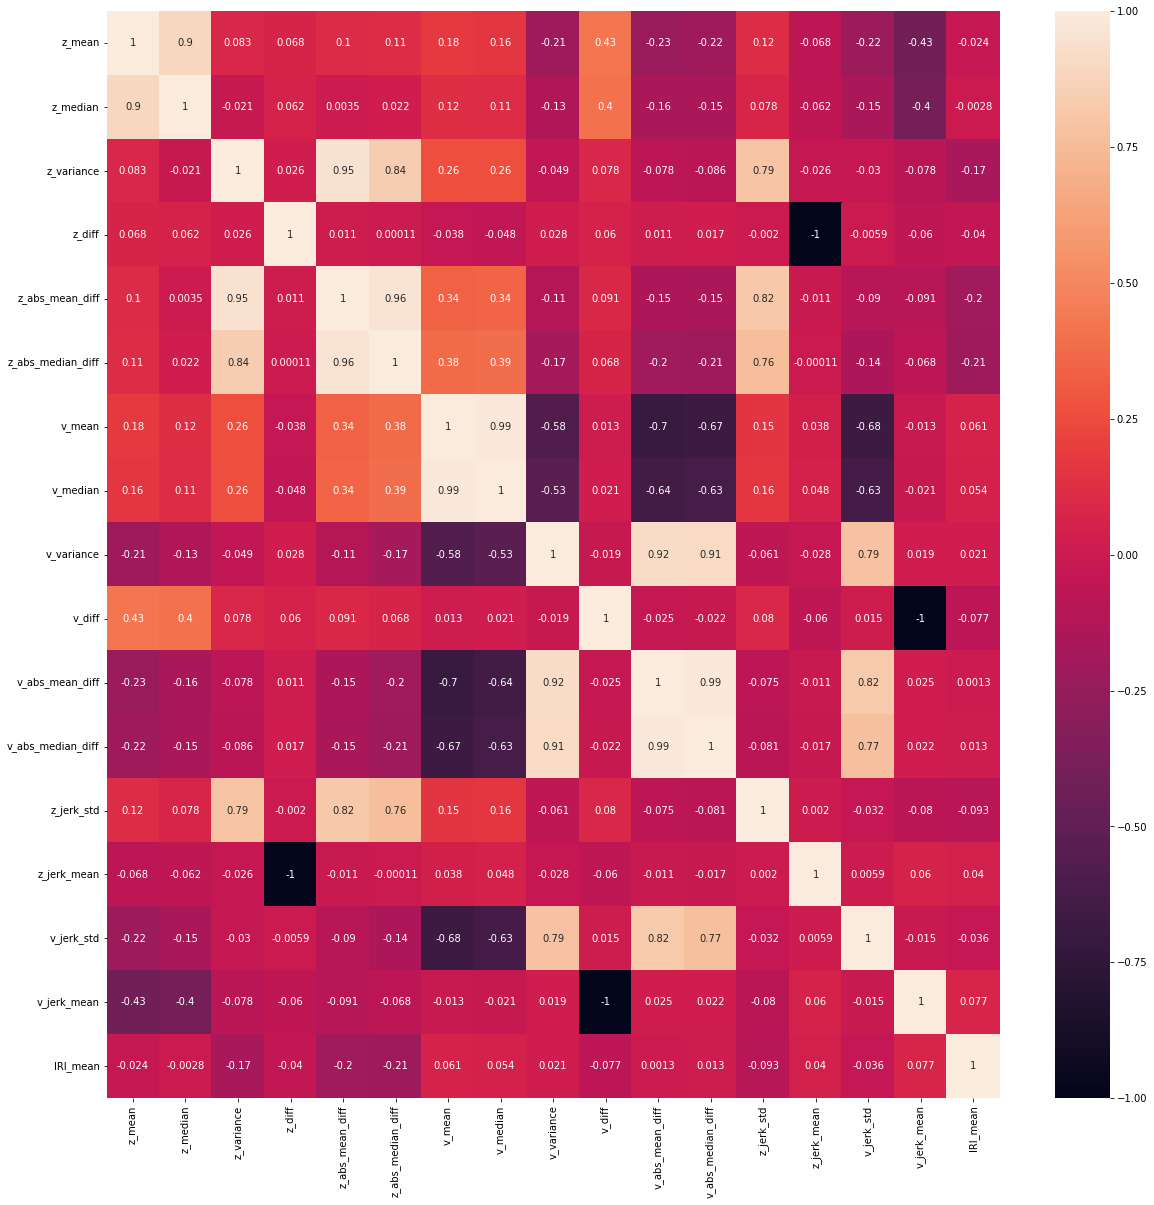

In [15]:
############### Feature engineering ####################
print("original data length: " + str(len(data2["z_smooth"])))

z_mean = list()
z_median = list()
z_variance = list()
z_diff = list()
z_abs_mean_diff = list()
z_abs_median_diff = list()
z_jerk_std = list()
z_jerk_mean = list()
for d in data2["z_smooth"].to_numpy():
    z_mean.append(np.mean(d))
    z_median.append(np.median(d))
    z_variance.append(d.var())
    z_diff.append(np.diff(d).mean())
    z_abs_mean_diff.append(mean(absolute(d - mean(d, axis=None)), axis=None))
    z_abs_median_diff.append(median(absolute(d - mean(d, axis=None)), axis=None))
    z_jerk_std.append(np.array(d[:-1] - d[1:]).std())
    z_jerk_mean.append(np.array(d[:-1] - d[1:]).mean())

v_mean = list()
v_median = list()
v_variance = list()
v_diff = list()
v_abs_mean_diff = list()
v_abs_median_diff = list()
v_jerk_std = list()
v_jerk_mean = list()
for d in data2["v_smooth"].to_numpy():
    v_mean.append(np.mean(d))
    v_median.append(np.median(d))
    v_variance.append(d.var())
    v_diff.append(np.diff(d).mean())
    v_abs_mean_diff.append(mean(absolute(d - mean(d, axis=None)), axis=None))
    v_abs_median_diff.append(median(absolute(d - mean(d, axis=None)), axis=None))
    v_jerk_std.append(np.array(d[:-1] - d[1:]).std())
    v_jerk_mean.append(np.array(d[:-1] - d[1:]).mean())

features = pd.DataFrame(
    {'z_mean': z_mean,
     'z_median': z_median,
     'z_variance': z_variance,
     'z_diff': z_diff,
     'z_abs_mean_diff': z_abs_mean_diff,
     'z_abs_median_diff': z_abs_median_diff,
     'v_mean': v_mean,
     'v_median': v_median,
     'v_variance': v_variance,
     'v_diff': v_diff,
     'v_abs_mean_diff': v_abs_mean_diff,
     'v_abs_median_diff': v_abs_median_diff,
     'z_jerk_std': z_jerk_std,
     'z_jerk_mean': z_jerk_mean,
     'v_jerk_std': v_jerk_std,
     'v_jerk_mean': v_jerk_mean
    })

correlation_map = features.copy()
correlation_map["IRI_mean"] = data2["IRI_mean"].astype('int64')
plt.figure(figsize=(20,20))
sns.heatmap(correlation_map.corr(),annot = True)
plt.show()

#cols_with_large_correlation = ["z_variance", "z_abs_mean_diff", "z_abs_median_diff", "v_diff", "z_jerk_std", "v_jerk_mean"]
#features = features[cols_with_large_correlation]

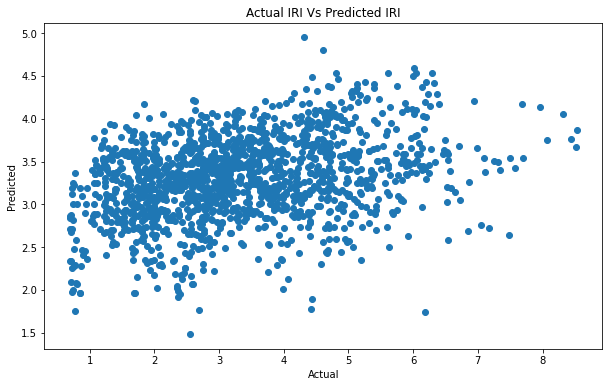

MAE is: 1.0930423213841947
R2 score: 0.08050683684745419
MAE is: 1.0323377489194723


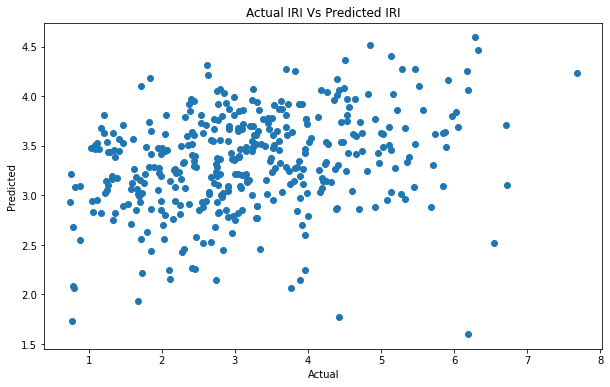

Sum of the different classes
1    844
2    685
Name: classes, dtype: int64
Logistic Regression
0.5725490196078431
[0.6461039  0.46039604]
[[199  77]
 [141  93]]
SVM
0.4470588235294118
[0.58892128 0.15568862]
[[202  74]
 [208  26]]
DecisionTree
0.5019607843137255
[0.48582996 0.51711027]
[[120 156]
 [ 98 136]]
RandomForest
0.4823529411764706
[0.52688172 0.42857143]
[[147 129]
 [135  99]]
MLPC
0.4568627450980392
[0.41684211 0.49174312]
[[ 99 177]
 [100 134]]


In [16]:
######## REGRESSION ########
X = features.values
X = (X-X.mean()) / X.std()
y = data2["IRI_mean"]
model_iri =  linear_model.LinearRegression()
model_iri.fit(X,y)

plt.scatter(y, model_iri.predict(X))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Actual IRI Vs Predicted IRI")
plt.show()

print("MAE is: " + str(mean_absolute_error(y, model_iri.predict(X))))

scaler = StandardScaler()
X = scaler.fit_transform(features.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("R2 score: " + str(lr.score(X_test, y_test)))
print("MAE is: " + str(mean_absolute_error(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Actual IRI Vs Predicted IRI")
plt.show()

######## CLASSIFICATION ########
# 1 = GOOD , 2 = ACCEPTABLE , 3 = MOVING TOWARD POOR , 4 = POOR , 5 = CRITICAL
# making classes on the category of "other roads"
class_list = list()
for iri_mean in data2["IRI_mean"]:
  if iri_mean < 1:
    class_list.append(1)
  elif iri_mean < 2:
    class_list.append(2)
  elif iri_mean < 3:
    class_list.append(3)
  elif iri_mean < 4:
    class_list.append(4)
  elif iri_mean <= 5 or iri_mean > 5:
    class_list.append(5)

# just trying out with 2 classes instead of 5
class_list = list()
mean_data = np.mean(data2["IRI_mean"])
for iri_mean in data2["IRI_mean"]:
  if iri_mean <= mean_data:
    class_list.append(1)
  else:
    class_list.append(2)

features["classes"] = class_list
print("Sum of the different classes")
print(features['classes'].value_counts())

print("Logistic Regression")
LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
split = int(len(features)*2.0/3)
training = features[:split]
test = features[split:]
x_train = training.loc[:, training.columns != 'classes']
x_test = test.loc[:, test.columns != 'classes']
y_train = training['classes']
y_test = test['classes']
LogReg.fit(x_train, y_train)
print(LogReg.score(x_test,y_test))
ypred=LogReg.predict(x_test)
print(f1_score(y_test, ypred, average = None))
print(confusion_matrix(y_test, ypred))

print("SVM")
sv = SVC()
sv.fit(x_train,y_train)
print(sv.score(x_test, y_test))
ypred = sv.predict(x_test)
print(f1_score(y_test, ypred, average = None))
print(confusion_matrix(y_test, ypred))

print("DecisionTree")
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(dt.score(x_test,y_test))
ypred = dt.predict(x_test)
print(f1_score(y_test, ypred, average = None))
print(confusion_matrix(y_test, ypred))

print("RandomForest")
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
ypred = rf.predict(x_test)
print(rf.score(x_test, y_test))
print(f1_score(y_test, ypred, average = None))
print(confusion_matrix(y_test, ypred))

print("MLPC")
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(150,100,30), activation='relu') #uses own validation
mlp.fit(x_train, y_train)
ypred = mlp.predict(x_test)
print(mlp.score(x_test, y_test))
print(f1_score(y_test, ypred, average = None))
print(confusion_matrix(y_test, ypred))